## Zad 1

In [1]:
import numpy as np

def create_random_matrix(
        m: int, 
        n: int, 
        mean: float = 0.0,
        std: float = 1.0
    ) -> np.ndarray:

    return np.random.randn(m, n) * std + mean

In [2]:
A = create_random_matrix(3, 3)
A

array([[ 0.45929261, -0.05560987, -0.1412761 ],
       [ 0.01190821, -1.53906869,  1.18790921],
       [ 0.26515328,  1.36530985,  0.70244177]])

In [3]:
from typing import Tuple, Optional

def vector_norm(vec: np.ndarray, ord: int) -> float:
    if ord <= 0:
        return np.max(np.abs(vec))
    norm_value = (np.abs(vec) ** ord).sum() ** (1 / ord)
    return norm_value.item()


def power_method(
        mat: np.ndarray, 
        norm: int = 2, 
        tol: float = 1e-10,
        max_iter: int = 1000,
        x0: Optional[np.ndarray] = None
    ) -> Tuple[np.ndarray, float, list[float]]:

    assert len(mat.shape) == 2, "Input matrix should be two-dimensional"
    assert mat.shape[0] == mat.shape[1], "Input matrix should be squared"

    error = float("inf")
    iter_counter = 0

    x = x0 if x0 is not None else np.random.uniform(low=0, high=1, size=mat.shape[0])
    errors = []

    while error > tol and iter_counter < max_iter:
        x /= vector_norm(x, norm)

        y = mat @ x
        m = ((mat @ x) @ x.T) / (x @ x.T)

        error = vector_norm(y - m * x, norm)
        errors.append(error)

        x = y
        iter_counter += 1

    eigenvalue = ((mat @ y) @ y.T) / (x @ x.T)
    return x, eigenvalue.item(), errors

In [4]:
eigenvector, eigenvalue, errors = power_method(A)
assert vector_norm(A @ eigenvector - eigenvalue * eigenvector, 2) < 1e-9, "Eigenvalue equation is not satisfied"

## Zad 2

In [5]:
def udf_decomposition(mat: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    eigenvalues, eigenvectors = np.linalg.eig(mat @ mat.T)
    U = eigenvectors
    D = np.diag(eigenvalues)
    V = A.T @ U @ np.linalg.inv(D)
    return U, D, V

In [6]:
U, D, V = udf_decomposition(A)
assert np.allclose(U @ D @ V.T,  A), "Matrix decomposition is not satisfied"

## Zad 3

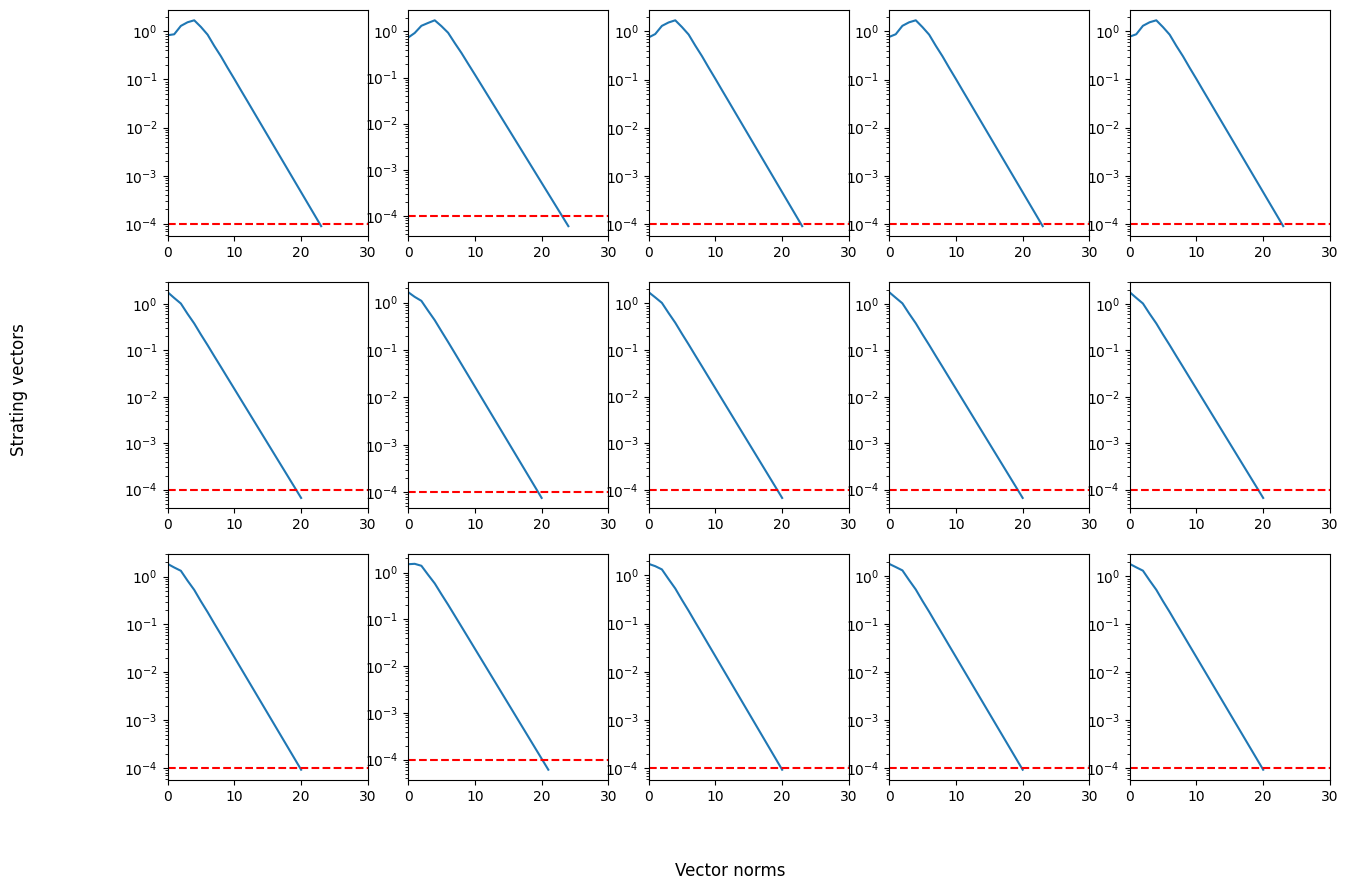

In [35]:
import matplotlib.pyplot as plt

vectors = np.random.uniform(low=0, high=1, size=(3, 3))
norms = [-1, 1, 2, 3, 4]

fig, axes = plt.subplots(3, 5, figsize=(15, 10))

for i, starting_vector in enumerate(vectors):
    for j, norm in enumerate(norms):
        eigenvector, eigenvalue, errors = power_method(
            A, norm, tol=1e-4, max_iter=1000, x0=starting_vector
        )

        ax = axes[i][j]
        ax.plot(errors)
        ax.set_xlim(0, 30)
        ax.semilogy()
        ax.axhline(1e-4, color="red", linestyle="--")


fig.supxlabel("Vector norms")
fig.supylabel("Strating vectors")
plt.show()

## Zad 4

In [37]:
s, v, d = np.linalg.svd(A)
U, D, V = udf_decomposition(A)


diff = vector_norm(s @ np.diag(v) @ d - U @ D @ V.T, 2)
diff

1.0557214101641806e-15